# Dataset overview and preprocess

In [13]:
import sys
import os
project_root = "C:/Users/lenovo/Desktop/06008481-math70076-assessment-2"  # Replace with your own path

# Append the full path of 03-src to sys.path
src_path = os.path.join(project_root, '03-src')
sys.path.append(src_path)

import importlib
import dataset_preproprcess  #Replace with the module name you need
importlib.reload(dataset_preproprcess)

<module 'dataset_preproprcess' from 'C:\\Users/lenovo/Desktop/06008481-math70076-assessment-2\\03-src\\dataset_preproprcess.py'>

In [26]:
import pandas as pd
from dataset_preproprcess import dataset_overview, preprocess_dataset

# Read the data and dictionary
data_path = os.path.join(project_root, '02-data', '02-01-raw-data')  # Correctly join directory paths

data_file = os.path.join(data_path, 'train.csv')  # Join the full file path

data = pd.read_csv(data_file)  # Read CSV document

FEATURES_Total = [c for c in data.columns]

RMV = ["ID","efs","efs_time","y"]
FEATURES = [c for c in data.columns if not c in RMV]


#data_dict = pd.read_csv("data_dictionary.csv")

# Get the data overview
overview = dataset_overview(data, FEATURES_Total)
print(overview)
# save the original data overview
overview.to_csv("C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/06-outputs/01-Data-overview/01-original-data-overview.csv", index=False)


Dataset Feature Overview
                   Feature Data Type  Unique Values Missing Rate
0                       ID     int64          28800        0.00%
1                dri_score    object             11        0.53%
2            psych_disturb    object              3        7.16%
3               cyto_score    object              7       28.01%
4                 diabetes    object              3        7.36%
5         hla_match_c_high   float64              3       16.04%
6           hla_high_res_8   float64              7       20.24%
7               tbi_status    object              8        0.00%
8               arrhythmia    object              3        7.65%
9            hla_low_res_6   float64              5       11.35%
10              graft_type    object              2        0.00%
11               vent_hist    object              2        0.90%
12             renal_issue    object              3        6.65%
13             pulm_severe    object              3        7.41%


In [27]:
## Fliter the features with  missing rate > 20%
# Step 1: Convert 'Missing Rate' from percentage string to float
overview["Missing Rate"] = overview["Missing Rate"].str.rstrip('%').astype(float)

# Step 2: Select features with missing rate <= 20%
valid_features = overview.loc[overview["Missing Rate"] <= 20, "Feature"].tolist()

# Step 3: Subset the original data
filtered_data = data[valid_features]

filtered_data_overview = dataset_overview(filtered_data, valid_features)
print(filtered_data_overview)

filtered_data_overview.to_csv("C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/06-outputs/01-Data-overview/02-filtered-data-overview.csv", index=False)


Dataset Feature Overview
                   Feature Data Type  Unique Values Missing Rate
0                       ID     int64          28800        0.00%
1                dri_score    object             11        0.53%
2            psych_disturb    object              3        7.16%
3                 diabetes    object              3        7.36%
4         hla_match_c_high   float64              3       16.04%
5               tbi_status    object              8        0.00%
6               arrhythmia    object              3        7.65%
7            hla_low_res_6   float64              5       11.35%
8               graft_type    object              2        0.00%
9                vent_hist    object              2        0.90%
10             renal_issue    object              3        6.65%
11             pulm_severe    object              3        7.41%
12        prim_disease_hct    object             18        0.00%
13          hla_high_res_6   float64              6       18.35%


In [ ]:
## efs=1 data overview
filtered_data.loc[filtered_data.efs==1].describe()

,ID,hla_match_c_high,hla_low_res_6,hla_high_res_6,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,15532.000000,12977.000000,13799.000000,12653.00000,12517.000000,13301.000000,13965.000000,14127.000000,13064.000000,15532.000000,...,15532.000000,14262.000000,13239.000000,15269.000000,15166.000000,13574.000000,13765.000000,12703.000000,15532.0,15532.000000
mean,14372.473281,1.777298,5.195666,5.16012,1.753615,5.204872,1.764411,1.743399,1.786819,2014.869238,...,43.116860,1.715468,1.711005,1.971052,82.909798,6.962133,1.738758,8.738330,1.0,6.252439
std,8316.918237,0.423784,1.188853,1.19428,0.438641,1.186602,0.430746,0.436773,0.417713,3.263555,...,19.115127,0.454305,0.459437,2.175301,11.224680,1.544796,0.443934,1.857339,0.0,3.386629
min,1.000000,0.000000,2.000000,2.00000,0.000000,2.000000,0.000000,1.000000,0.000000,2008.000000,...,0.044000,0.000000,0.000000,0.000000,40.000000,2.000000,0.000000,4.000000,1.0,0.333000
25%,7185.750000,2.000000,4.000000,4.00000,2.000000,5.000000,2.000000,1.000000,2.000000,2013.000000,...,32.688250,1.000000,1.000000,0.000000,70.000000,6.000000,1.000000,8.000000,1.0,4.477000
50%,14305.000000,2.000000,6.000000,6.00000,2.000000,6.000000,2.000000,2.000000,2.000000,2016.000000,...,47.171500,2.000000,2.000000,1.000000,90.000000,8.000000,2.000000,10.000000,1.0,5.803000
75%,21586.250000,2.000000,6.000000,6.00000,2.000000,6.000000,2.000000,2.000000,2.000000,2017.000000,...,59.270750,2.000000,2.000000,3.000000,90.000000,8.000000,2.000000,10.000000,1.0,7.322000
max,28796.000000,2.000000,6.000000,6.00000,2.000000,6.000000,2.000000,2.000000,2.000000,2020.000000,...,73.726000,2.000000,2.000000,10.000000,100.000000,8.000000,2.000000,10.000000,1.0,120.009000


In [ ]:
## efs=0 data overview
filtered_data.loc[filtered_data.efs==0].describe()

,ID,hla_match_c_high,hla_low_res_6,hla_high_res_6,hla_match_dqb1_high,hla_nmdp_6,hla_match_c_low,hla_match_drb1_low,hla_match_dqb1_low,year_hct,...,age_at_hct,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
count,13268.000000,11203.000000,11731.000000,10863.000000,11084.000000,11302.000000,12035.000000,12030.000000,11542.000000,13268.000000,...,13268.000000,12148.000000,11473.000000,13054.000000,12764.000000,11573.000000,11683.000000,11033.000000,13268.0,13268.000000
mean,14431.138453,1.749710,5.081749,5.049894,1.717972,5.107945,1.750145,1.682294,1.759054,2015.542584,...,33.449502,1.701597,1.686481,1.388004,84.927922,6.834615,1.669862,8.579897,0.0,43.121212
std,8310.758652,0.440758,1.226818,1.234328,0.456971,1.220504,0.440746,0.465604,0.437095,2.979882,...,22.195595,0.462764,0.471399,1.706670,10.689003,1.585708,0.478046,1.908148,0.0,24.258854
min,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2008.000000,...,0.044000,0.000000,0.000000,0.000000,40.000000,3.000000,0.000000,4.000000,0.0,3.212000
25%,7220.750000,2.000000,4.000000,4.000000,1.000000,4.000000,2.000000,1.000000,2.000000,2014.000000,...,11.967250,1.000000,1.000000,0.000000,70.000000,6.000000,1.000000,7.000000,0.0,25.273500
50%,14520.000000,2.000000,6.000000,6.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2016.000000,...,35.820000,2.000000,2.000000,1.000000,90.000000,8.000000,2.000000,10.000000,0.0,37.194000
75%,21617.250000,2.000000,6.000000,6.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2018.000000,...,52.865750,2.000000,2.000000,2.000000,90.000000,8.000000,2.000000,10.000000,0.0,54.452500
max,28799.000000,2.000000,6.000000,6.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2020.000000,...,73.670000,2.000000,2.000000,10.000000,100.000000,8.000000,2.000000,10.000000,0.0,156.819000


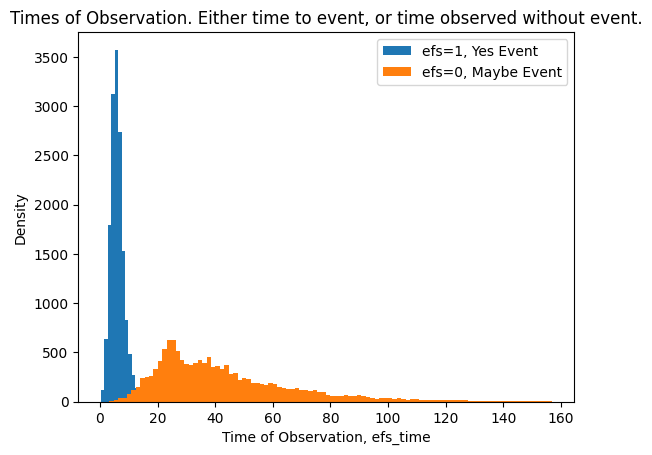

In [29]:
import matplotlib.pyplot as plt

plt.hist(filtered_data.loc[filtered_data.efs==1,"efs_time"],bins=100,label="efs=1, Yes Event")
plt.hist(filtered_data.loc[filtered_data.efs==0,"efs_time"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Time of Observation, efs_time")
plt.ylabel("Density")
plt.title("Times of Observation. Either time to event, or time observed without event.")
plt.legend()
plt.savefig("C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/06-outputs/01-Data-overview/03-event-density.png")
plt.show()



In [17]:
data_deal = preprocess_dataset(filtered_data, valid_features)


Total categorical features (including low-cardinality numerics): 48 → ['dri_score', 'psych_disturb', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'rituximab', 'prod_type', 'conditioning_intensity', 'ethnicity', 'obesity', 'in_vivo_tcd', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate', 'hla_match_c_high', 'hla_low_res_6', 'hla_high_res_6', 'hla_match_dqb1_high', 'hla_nmdp_6', 'hla_match_c_low', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'year_hct', 'hla_match_a_high', 'hla_match_b_low', 'hla_match_a_low', 'hla_match_b_high', 'comorbidity_score', 'karnofsky_score', 'hla_low_res_8', 'hla_match_drb1_high', 'hla_low_res_10', 'efs']


In [18]:
data_deal_overview = dataset_overview(data_deal, FEATURES_Total)
print(data_deal_overview)


Dataset Feature Overview
                   Feature Data Type  Unique Values Missing Rate
0                       ID     int32          28800        0.00%
1                dri_score  category             12        0.00%
2            psych_disturb  category              4        0.00%
3                 diabetes  category              4        0.00%
4         hla_match_c_high  category              4        0.00%
5               tbi_status  category              8        0.00%
6               arrhythmia  category              4        0.00%
7            hla_low_res_6  category              6        0.00%
8               graft_type  category              2        0.00%
9                vent_hist  category              3        0.00%
10             renal_issue  category              4        0.00%
11             pulm_severe  category              4        0.00%
12        prim_disease_hct  category             18        0.00%
13          hla_high_res_6  category              7        0.00%


In [19]:
data_deal.to_csv('C:/Users/lenovo/Desktop/06008481-math70076-assessment-2/02-data/02-02-derived-data/01-processed-data.csv', index=False)